# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Train set size: ",X_train.shape)
print("Test set size: ",X_test.shape)

Train set size:  (5100, 58)
Test set size:  (1276, 58)


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
import numpy as np

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
print("RSMS Test",tree_rmse)

RSMS Test 24860.78439735311


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
rmses_tr = []
rmses_te = []

for depth in range(1,30,5):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    y_pred_test = dtr.predict(X_test)
    y_pred_train = dtr.predict(X_train)
    calc = np.sqrt(mean_squared_error(y_train,y_pred_train))
    rmses_tr.append(calc)
    calc = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmses_te.append(calc)

rmses_train = np.asarray(rmses_tr)
rmses_test = np.asarray(rmses_te)    
    
print("RMSEs train: ",rmses_train)
print("RMSEs test: ", rmses_test)

RMSEs train:  [26593.29289898 20341.01110376 14541.03926667  6934.3694927
  1887.61419343   693.5834706 ]
RMSEs test:  [27190.94965933 22014.61421825 22872.27053108 24632.61129842
 24929.4275208  24936.20548748]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

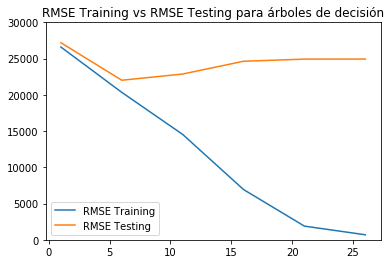

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline 
plt.plot(range(1,30,5), rmses_train, label='RMSE Training')
plt.plot(range(1,30,5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
print("RSMS Test",knn_rmse)

RSMS Test 23615.076939779363


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
# Calculá los cambio en el rmse en esta celda

rmses_tr = []
rmses_te = []

for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    calc = np.sqrt(mean_squared_error(y_train,y_pred_train))
    rmses_tr.append(calc)
    calc = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmses_te.append(calc)

rmses_train = np.asarray(rmses_tr)
rmses_test = np.asarray(rmses_te)    
    
print("RMSEs train: ",rmses_train)
print("RMSEs test: ", rmses_test)

RMSEs train:  [  721.80224941 13767.16341715 16333.87280177 17650.91318051
 18620.90428252 19198.88671612 19628.21938811 19984.12011884
 20267.88438104 20530.07877865 20771.58486107 20963.19360024
 21101.69536171 21232.48621867 21344.54191909 21482.09021787
 21574.16020878 21689.00714123 21766.55172021 21839.26473244
 21976.94877523 22048.17516388 22117.60951717 22192.02123306
 22261.11196561 22342.29043033 22407.82771741 22443.15389237
 22473.73477644]
RMSEs test:  [28152.73084867 25179.25573945 24502.14729588 24192.99752869
 23615.07693978 23539.15042008 23406.1460161  23330.22295786
 23213.81204949 23199.81592782 23221.43164709 23221.35318731
 23185.78870631 23226.28257196 23243.18723824 23239.64771986
 23233.76254661 23260.23642188 23274.4790909  23319.65988108
 23356.68235761 23349.64098767 23337.29773018 23387.37377979
 23451.9041561  23467.20896303 23500.02761208 23522.48140518
 23559.25961672]


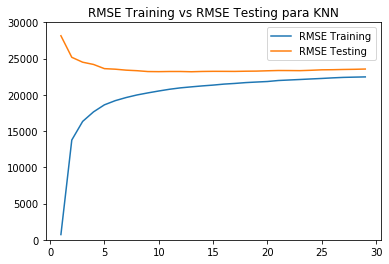

In [11]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [14]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth=5)

# Indicamos que queremos hacer cross validation con 10 cortes. 
# Es decir vamos a iterar 10 veces y obtener los scores de cada iteración
score = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
score = nmsq2rmse(score)
print(score)

[21939.58263019 22649.83615668 20552.17232585 20314.52966785
 21522.40356148 23072.2034479  21863.43702403 22053.95467936
 22405.4002666  22033.82274153]


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [15]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [16]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [17]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,175000.000,147241.647,27758.353
1,144000.000,136022.950,7977.050
2,86500.000,88113.040,1613.040
3,83000.000,83851.498,851.498
4,130000.000,124265.249,5734.751
5,81000.000,83851.498,2851.498
6,120000.000,119863.168,136.832
7,65000.000,74764.146,9764.146
8,125000.000,136022.950,11022.950
9,85000.000,95021.985,10021.985
